In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
import pylab

In [332]:
plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('axes', axisbelow=True)
label_size = 20
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = label_size
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

lss = ['--',  ':', '-.', '-', '--', '-.', ':', '-', '--', '-.', ':', '-']
mss = ['>', 'o',  's', 'D', '>', 's', 'o', 'D', '>', 's', 'o', 'D']


In [476]:
mta_data = pd.read_csv('data/MTA_Bridges___Tunnels_Hourly_Traffic_Rates__Beginning_2010_20241012.csv', thousands=',',
                       dtype={
                        'Plaza ID': int,
                        'Hour': int,
                        'Direction': str,
                        '# Vehicles - E-ZPass': int,
                        '# Vehicles - VToll': int
                       }, parse_dates=['Date'])
mta_data['Total Vehicles'] = mta_data['# Vehicles - E-ZPass'] + mta_data['# Vehicles - VToll']

plaza_ids = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
mta_data = mta_data[mta_data['Plaza ID'].isin(plaza_ids)]

plaza_ids_to_acronyms = {
    21: 'TBX',
    22: 'TBM',
    23: 'BWB',
    24: 'HHB',
    25: 'MPB',
    26: 'CBB',
    27: 'QMT',
    28: 'HCT',
    29: 'TNB',
    30: 'VNB'
}

In [141]:
mta_data['Date'].dt.isocalendar().week

0          40
1          40
2          40
3          40
4          40
           ..
1052366    35
1052367    35
1052368    35
1052369    35
1052370    35
Name: week, Length: 1050355, dtype: UInt32

In [530]:
inbound = mta_data[mta_data['Direction'] == 'I']
inbound['Day of Week'] = inbound['Date'].dt.dayofweek
inbound['Week'] = inbound['Date'].dt.isocalendar().week
inbound['Year'] = inbound['Date'].dt.year
inbound

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Total Vehicles,Day of Week,Week,Year
0,21,2024-10-05,0,I,2514,597,3111,5,40,2024
1,21,2024-10-05,1,I,1607,414,2021,5,40,2024
2,21,2024-10-05,2,I,1176,332,1508,5,40,2024
3,21,2024-10-05,3,I,1223,324,1547,5,40,2024
4,21,2024-10-05,4,I,1778,453,2231,5,40,2024
...,...,...,...,...,...,...,...,...,...,...
1052337,28,2017-09-03,19,I,820,133,953,6,35,2017
1052339,28,2017-09-03,20,I,751,156,907,6,35,2017
1052341,28,2017-09-03,21,I,595,103,698,6,35,2017
1052343,28,2017-09-03,22,I,556,94,650,6,35,2017


In [531]:
y = inbound['Total Vehicles']
categorical_vars = ['Plaza ID']
numerical_vars = ['Hour', 'Day of Week', 'Week', 'Year']
X = pd.get_dummies(inbound[categorical_vars + numerical_vars], columns=categorical_vars)

In [532]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=50, max_depth=5, n_jobs=-1)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [533]:
inbound['XGBoost Prediction'] = model.predict(X)

In [535]:
inbound

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Total Vehicles,Day of Week,Week,Year,XGBoost Prediction
0,21,2024-10-05,0,I,2514,597,3111,5,40,2024,3590.621826
1,21,2024-10-05,1,I,1607,414,2021,5,40,2024,2298.624512
2,21,2024-10-05,2,I,1176,332,1508,5,40,2024,1716.481689
3,21,2024-10-05,3,I,1223,324,1547,5,40,2024,1716.481689
4,21,2024-10-05,4,I,1778,453,2231,5,40,2024,2075.604004
...,...,...,...,...,...,...,...,...,...,...,...
1052337,28,2017-09-03,19,I,820,133,953,6,35,2017,1236.024658
1052339,28,2017-09-03,20,I,751,156,907,6,35,2017,885.316345
1052341,28,2017-09-03,21,I,595,103,698,6,35,2017,715.504578
1052343,28,2017-09-03,22,I,556,94,650,6,35,2017,634.844421


In [512]:
# since we are missing hours in some parts, using a dictionary would be the safest option
data_dict = dict()
xgboost_dict = dict()
# keys are ((plaza_id, day of week), (week number, year))
for date in tqdm(pd.date_range(start="2017-09-03", end="2024-10-05")):
    pydatetime = date.to_pydatetime()
    week_number = pydatetime.isocalendar().week
    year = pydatetime.isocalendar().year
    weekday = pydatetime.isocalendar().weekday
    
    data_slice = inbound[(mta_data['Date'] == date) & (mta_data['Direction'] == 'I')]
    
    for plaza_id in plaza_ids:
        if data_slice.empty:
            data_dict[((plaza_id, weekday), (week_number, year))] = None
            xgboost_dict[((plaza_id, weekday), (week_number, year))] = None
            continue
        key = ((plaza_id, weekday), (week_number, year))
        data = data_slice[data_slice['Plaza ID'] == plaza_id ][['Hour', 'Total Vehicles']]
        xgboost_data = data_slice[data_slice['Plaza ID'] == plaza_id ][['Hour', 'XGBoost Prediction']]
        if data.empty:
            data_dict[((plaza_id, weekday), (week_number, year))] = None
            xgboost_dict[((plaza_id, weekday), (week_number, year))] = None
            continue
        data.set_index('Hour', inplace=True)
        xgboost_data.set_index('Hour', inplace=True)
        data_dict[key] = data.reindex(list(range(24))).interpolate()
        xgboost_dict[key] = xgboost_data.reindex(list(range(24))).interpolate()
        
normalized_dict = dict()
for key, value in data_dict.items():
    if value is None:
        normalized_dict[key] = None
        continue
    if len(value) == 0:
        normalized_dict[key] = None
        continue
    normalized_dict[key] = value / value.sum()

100%|██████████| 2590/2590 [01:40<00:00, 25.77it/s]


In [ ]:
count = 0
for v in data_dict.values():
    if v is None:
        count += 1
        continue
    if len(v) == 0:
        count += 1
        continue
print(f'Mising Value: {count}, Percent Missing: {count / len(data_dict) * 100}%')

Mising Value: 4616, Percent Missing: 17.822393822393824%


`data_dict` has keys in the form ((plaza id, weekday), (week number, year)). From this, we can build a matrix where the first pairs along the rows and the second pairs along the columns.

We need to test 3 different setups to see which is the best:
1. (normalize, Wasserstein)
2. (normalize, Euclidean)
3. (no normalization, Euclidean)

We cannot use Wasserstein with no normalization because then it is not a distribution.

The matrix size is 70 x (number of weeks * number of years). The 70 comes from (number of days in week * 10 plaza_ids)

In [297]:
from scipy.integrate import quad
from functools import partial
from numpy import quantile

import warnings
warnings.filterwarnings("ignore")

def wasserstein2(inv_cdf1, inv_cdf2):
    """
    Compute the squared 2-Wasserstein metric.
    """
    # Combine the inner part of the integral into one function
    # Estimate integral via quadrature
    y, _ = quad(lambda x : np.power((inv_cdf1(x) - inv_cdf2(x)), 2), 0, 1)
    return y

def wasserstein2_mc(ppf1, ppf2):
    N = 10000
    u = np.random.uniform(0.001,0.999,N)
    return np.sum(np.power(ppf1(u) - ppf2(u), 2)) / N

def discrete_quantile(values, cdf, q):
    # Find the smallest value where the CDF is greater than or equal to the quantile q
    quantile_value = values[np.searchsorted(cdf, q)]
    
    return quantile_value

In [ ]:
ppf_dict = dict()
for key, value in data_dict.items():
    if value is None:
        ppf_dict[key] = None
        continue
    if len(value) == 0:
        ppf_dict[key] = None
        continue
    value = value / value.sum()
    ppf = partial(discrete_quantile, value.index.to_numpy(), value.cumsum().values.flatten())
    ppf_dict[key] = ppf

In [ ]:
from itertools import combinations

def get_wasserstein_dists(ppf_dict):
    """Return the pairwise Wasserstein distance for the given row (plaza_id, weekday)
    to all the other rows.

    Args:
        plaza_id (int): ID of bridge or tunnel
        weekday (int): Day of the week (1-7)
        ppf_dict (dict): Dictionary of inverse CDFs

    Returns:
        dict: Dictionary of pairwise Wasserstein distances
    """
    rows = set(k[0] for k in ppf_dict.keys())
    row_pairs = list(combinations(rows, 2))
    cols = set(k[1] for k in ppf_dict.keys())
    
    dists = dict()
    
    for key1, key2 in tqdm(row_pairs):
        key = frozenset([key1, key2])
        
        if dists.get(key) is None:
            dists[key] = dict()
        
        for c in cols:
            key_row1 = (key1, c)
            key_row2 = (key2, c)
            if ppf_dict.get(key_row1) is None or ppf_dict.get(key_row2) is None:
                dists[key][c] = None
                continue
            dists[key][c] = wasserstein2_mc(ppf_dict[key_row1], ppf_dict[key_row2])
    return dists

key = ((24, 2), (36, 2017))
pairwise_dists = get_wasserstein_dists(ppf_dict)

100%|██████████| 2415/2415 [05:49<00:00,  6.91it/s]


In [ ]:
import pickle

with open('pairwise_dists.pkl', 'wb') as f:
    pickle.dump(pairwise_dists, f)

In [183]:
def get_neighbors(key, data_dict, dists, dist_threshold):
    (row, col) = key # row is (plaza_id, weekday), col is (week_number, year)
    neighbors = [] # list of neighbors
    for pair, dist_dict in dists.items(): # iterate over all pairs
        if row not in pair: # if row is not in pair, continue
            continue
        other_row = next(iter(pair - {row})) # get the other row
        if data_dict.get((other_row, col)) is None:
            continue
        dist_sum = 0
        count = 0
        for col2, dist in dist_dict.items(): # iterate over all columns
            if col == col2 or dist is None or np.isnan(dist): # if column is the same or distance is None,
                continue
            dist_sum += dist # add distance to sum
            count += 1
        if count == 0:
            continue
        # if average distance is less than threshold, add to neighbors
        if (dist_sum / count) < dist_threshold:
            neighbors.append(other_row)
    return neighbors

In [516]:
import random

def get_barycenter(key, ppf_dict, neighbors):
    (_, _), (week_number, year) = key
    neighbor_ppfs = []
    for neighbor_key in neighbors:
        plaza_id2, weekday2 = neighbor_key
        if ppf_dict.get(((plaza_id2, weekday2), (week_number, year))) is not None:
            neighbor_ppfs.append(ppf_dict[((plaza_id2, weekday2), (week_number, year))])
    return lambda x: sum(ppf(x) for ppf in neighbor_ppfs) / len(neighbor_ppfs)
    # return lambda x: np.mean([ppf(x) for ppf in neighbor_ppfs])

def get_estimate_discrete_dist(key, ppf_dict, dists, dist_threshold):
    neighbors = get_neighbors(key, ppf_dict, dists, dist_threshold)
    # if ppf_dict.get(key) is not None:
        # neighbors.append(key[0])
    estimate_ppf = get_barycenter(key, ppf_dict, neighbors)
    x = np.linspace(0, 0.999999, 10000)
    y = [estimate_ppf(i) for i in x]

    barycenter_cumsum = np.interp(list(range(24)), y, x)
    return [barycenter_cumsum[0]] + np.diff(barycenter_cumsum).tolist()

from hyperopt import hp, tpe, fmin

def evaluate_dist_threshold(key, ppf_dict, dists, dist_threshold):
    neighbors = get_neighbors(key, ppf_dict, dists, dist_threshold)
    if len(neighbors) == 0: # if no neighbors, return high number
        return 100
    observed_ppf = ppf_dict[key] # observed ppf
    est_ppf = get_barycenter(key, ppf_dict, neighbors) # estimated ppf
    return wasserstein2(observed_ppf, est_ppf) # return wasserstein distance

def optimize_dist_threshold(key, ppf_dict, dists, num_tests=10):
    keys_to_sample_from = list(set(k for k in ppf_dict.keys() 
                                   if ppf_dict.get(k) is not None and k[0] == key[0] and k != key))
    rand_keys = random.sample(keys_to_sample_from, num_tests)
    
    def obj(dist_threshold):
        return sum(evaluate_dist_threshold(key=key, ppf_dict=ppf_dict, dists=dists, dist_threshold=dist_threshold) for key in rand_keys)
    
    best_eta = fmin(fn=obj, verbose = True, space=hp.uniform('eta', 0.0001, 10.0), algo=tpe.suggest, max_evals=50)
    return best_eta['eta']


In [ ]:
key = ((24, 2), (36, 2017))
dist_threshold = optimize_dist_threshold(key, ppf_dict, pairwise_dists)

In [ ]:
# get key's features
plaza_id, weekday = key[0]
week_number, year = key[1]

In [542]:
X

,Hour,Day of Week,Week,Year,Plaza ID_21,Plaza ID_23,Plaza ID_24,Plaza ID_25,Plaza ID_26,Plaza ID_27,Plaza ID_28,Plaza ID_29,Plaza ID_30
0,0,5,40,2024,True,False,False,False,False,False,False,False,False
1,1,5,40,2024,True,False,False,False,False,False,False,False,False
2,2,5,40,2024,True,False,False,False,False,False,False,False,False
3,3,5,40,2024,True,False,False,False,False,False,False,False,False
4,4,5,40,2024,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052337,19,6,35,2017,False,False,False,False,False,False,True,False,False
1052339,20,6,35,2017,False,False,False,False,False,False,True,False,False
1052341,21,6,35,2017,False,False,False,False,False,False,True,False,False
1052343,22,6,35,2017,False,False,False,False,False,False,True,False,False


In [566]:
# refit xgboost model without the key's data
X = pd.get_dummies(inbound[categorical_vars + numerical_vars], columns=categorical_vars)
X = X[~((inbound['Plaza ID'] == key[0][0]) & (inbound['Day of Week'] == key[0][1]) & (inbound['Week'] == key[1][0]) & (inbound['Year'] == key[1][1]))]
y = inbound['Total Vehicles'][~((inbound['Plaza ID'] == key[0][0]) & (inbound['Day of Week'] == key[0][1]) & (inbound['Week'] == key[1][0]) & (inbound['Year'] == key[1][1]))]

model = XGBRegressor(n_estimators=1000, max_depth=10, n_jobs=-1)
model.fit(X, y)
new_data = pd.DataFrame.from_dict({"Hour": list(range(24)), "Day of Week": [weekday] * 24, "Week": [week_number] * 24, "Year": [year] * 24, "Plaza ID": [plaza_id] * 24})
# Convert to same format as original features
new_data = pd.get_dummies(new_data, columns=["Plaza ID"]).reindex(columns = X.columns, fill_value=False)
xgboost_pred = model.predict(new_data)

Distance Threshold: 0.4360125998681842
Number of neighbors (including self): 2


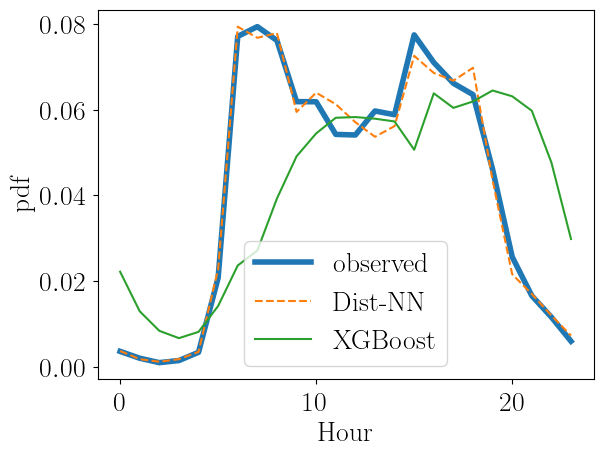

In [571]:
print(f'Distance Threshold: {dist_threshold}')
neighbors = get_neighbors(key, ppf_dict, pairwise_dists, dist_threshold)
print(f'Number of neighbors (including self): {len(neighbors) + 1}')
plt.figure()
plt.plot(range(24), (data_dict[key] / data_dict[key].sum()).values, label='observed', linewidth=4)
est_dist = get_estimate_discrete_dist(key, ppf_dict, pairwise_dists, dist_threshold)
plt.plot(range(24), est_dist, label='Dist-NN', linestyle='--')
ax = plt.gca()
# for neighbor in neighbors:
    # normalized_dict.get((neighbor, key[1])).plot(ax=ax)
plt.plot(list(range(24)), (xgboost_pred / np.sum(xgboost_pred)), label='XGBoost')
plt.xlabel('Hour')
plt.ylabel('pdf')
plt.legend()
plt.show()

#### 2. (normalize, Euclidean)

In [ ]:
def get_euclidean_dists(normalized_dict):
    """Return the pairwise Euclidean distance for the given row (plaza_id, weekday)
    to all the other rows.

    Args:
        plaza_id (int): ID of bridge or tunnel
        weekday (int): Day of the week (1-7)
        ppf_dict (dict): Dictionary of inverse CDFs

    Returns:
        dict: Dictionary of pairwise Wasserstein distances
    """
    rows = set(k[0] for k in ppf_dict.keys())
    row_pairs = list(combinations(rows, 2))
    cols = set(k[1] for k in ppf_dict.keys())
    
    dists = dict()
    
    for key1, key2 in tqdm(row_pairs):
        key = frozenset([key1, key2])
        
        if dists.get(key) is None:
            dists[key] = dict()
        
        for c in cols:
            key_row1 = (key1, c)
            key_row2 = (key2, c)
            if normalized_dict.get(key_row1) is None or normalized_dict.get(key_row2) is None:
                dists[key][c] = None
                continue
            dists[key][c] = np.sum(np.power(normalized_dict.get(key_row1).to_numpy() - normalized_dict.get(key_row2).to_numpy(), 2))
    return dists

normalized_euclidean_dists = get_euclidean_dists(normalized_dict)

In [ ]:
with open('pairwise_normalized_euclidean_dists.pkl', 'wb') as f:
    pickle.dump(normalized_euclidean_dists, f)

100%|██████████| 50/50 [00:03<00:00, 13.46trial/s, best loss: 0.00034480311617262173]
Distance Threshold: 0.0018969162803094978
Number of neighbors (including self): 3


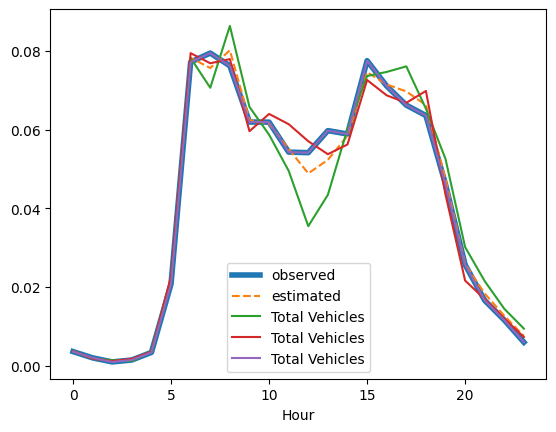

In [312]:
def get_euclidean_avg(key, input_dict, neighbors):
    neighbor_data = np.array([input_dict[(neighbor, key[1])].values for neighbor in neighbors if normalized_dict.get((neighbor, key[1])) is not None])
    return np.mean(neighbor_data, axis=0).flatten()

def evaluate_dist_threshold_euclidean(key, input_dict, euclidean_dists, dist_threshold):
    neighbors = get_neighbors(key, normalized_dict, euclidean_dists, dist_threshold)
    if len(neighbors) == 0: # if no neighbors, return high number
        return np.inf
    observed_data = input_dict.get(key).values # observed
    est = get_euclidean_avg(key, input_dict, neighbors) # estimated
    return np.mean(np.power(observed_data.flatten() - est, 2)) # return squared Euclidean distance

def optimize_dist_threshold_euclidean(key, input_dict, euclidean_dists, max_threshold = 0.1, min_threshold=1e-6, num_tests=10):
    keys_to_sample_from = list(set(k for k in input_dict.keys() 
                                   if input_dict.get(k) is not None and k[0] == key[0] and k != key))
    rand_keys = random.sample(keys_to_sample_from, num_tests)
    def obj(dist_threshold):
        return sum(evaluate_dist_threshold_euclidean(key=key, 
                                                     input_dict=input_dict, 
                                                     euclidean_dists=euclidean_dists, 
                                                     dist_threshold=dist_threshold) for key in rand_keys)
    
    best_eta = fmin(fn=obj, verbose = True, space=hp.uniform('eta', min_threshold, max_threshold), algo=tpe.suggest, max_evals=50)
    return best_eta['eta']

key = ((24, 2), (36, 2017))
dist_threshold = optimize_dist_threshold_euclidean(key, normalized_dict, normalized_euclidean_dists)
print(f'Distance Threshold: {dist_threshold}')
neighbors = get_neighbors(key, normalized_dict, normalized_euclidean_dists, dist_threshold)
if normalized_dict.get(key) is not None:
    neighbors.append(key[0])
print(f'Number of neighbors (including self): {len(neighbors)}')
plt.figure()
plt.plot(range(24), normalized_dict.get(key).values, label='observed', linewidth=4)
est = get_euclidean_avg(key, normalized_dict, neighbors)
plt.plot(range(24), est, label='estimated', linestyle='--')
ax = plt.gca()
for neighbor in neighbors:
    if normalized_dict.get((neighbor, key[1])) is not None:
        normalized_dict.get((neighbor, key[1])).plot(ax=ax)
plt.legend()
plt.show()

#### 3. (no normalization, Euclidean)

In [189]:
pairwise_euclidean_dists = get_euclidean_dists(data_dict)

100%|██████████| 2415/2415 [00:03<00:00, 756.05it/s]


In [190]:
with open('pairwise_euclidean_dists.pkl', 'wb') as f:
    pickle.dump(pairwise_euclidean_dists, f)

In [266]:
evaluate_dist_threshold_euclidean(key=((24, 2), (48, 2019)), 
                                  input_dict=data_dict, 
                                  euclidean_dists=pairwise_euclidean_dists, 
                                  dist_threshold=10e6)

304305.9699074074

In [272]:
key = ((24, 2), (36, 2017))

dist_threshold = optimize_dist_threshold_euclidean(key, data_dict, pairwise_euclidean_dists, max_threshold=10e10, min_threshold=1e5)
print(f'Distance Threshold: {dist_threshold}')
neighbors = get_neighbors(key, data_dict, pairwise_euclidean_dists, dist_threshold)
if data_dict.get(key) is not None:
    neighbors.append(key[0])
print(f'Number of neighbors (including self): {len(neighbors)}')
plt.figure()
plt.plot(range(24), data_dict.get(key).values, label='observed', linewidth=4)
est = get_euclidean_avg(key, data_dict, neighbors)
plt.plot(range(24), est, label='estimated', linestyle='--')
plt.legend()
plt.show()

[((24, 2), (37, 2017)), ((24, 2), (16, 2018)), ((24, 2), (3, 2022)), ((24, 2), (9, 2019)), ((24, 2), (30, 2019)), ((24, 2), (14, 2019)), ((24, 2), (8, 2018)), ((24, 2), (37, 2023)), ((24, 2), (14, 2020)), ((24, 2), (29, 2024))]
100%|██████████| 50/50 [00:03<00:00, 13.60trial/s, best loss=?]


AllTrialsFailed: 

## Comparison

In [444]:
import random

rows = sorted(list(set(k[0] for k in data_dict.keys())), key=lambda x: (x[0], x[1]))
cols = sorted(list(set(k[1] for k in data_dict.keys())), key=lambda x: (x[1], x[0]))

total_matrix = np.zeros((len(rows), len(cols)))
mask_matrix = np.zeros((len(rows), len(cols)))

key_to_index = dict()
index_to_key = dict()

for i, r in enumerate(rows):
    for j, c in enumerate(cols):
        key = (r, c)
        key_to_index[key] = (i, j)
        index_to_key[(i, j)] = key
        if data_dict.get(key) is not None:
            total_matrix[i, j] = np.sum(data_dict[key].values)
            mask_matrix[i, j] = 1
        else:
            total_matrix[i, j] = np.nan
            mask_matrix[i, j] = 0

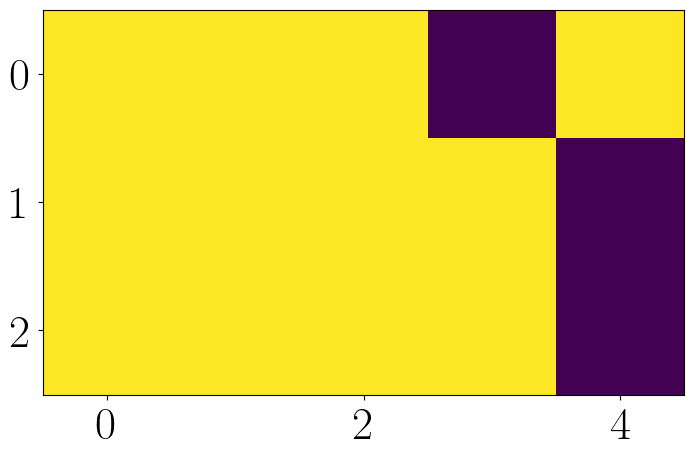

In [458]:
plt.figure(figsize=(10,5))
plt.imshow(mask_matrix[20:23,45:50], cmap='viridis')
plt.show()

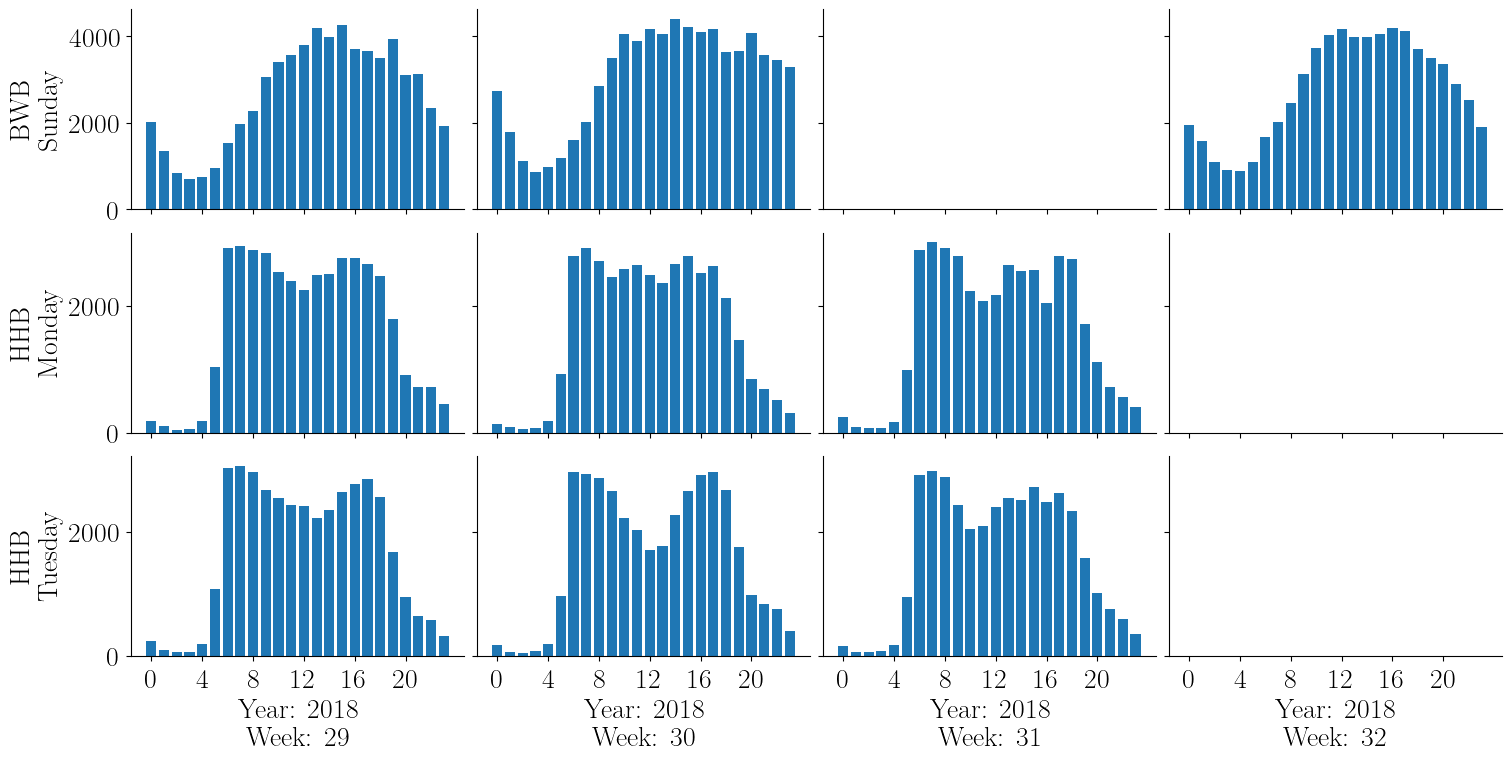

In [501]:
import seaborn as sns

label_size = 20
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = label_size
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

fig, axes = plt.subplots(3, 4, figsize=(15, 7.5), sharey='row', sharex='col', layout="compressed")
min_x = np.inf
max_x = -np.inf
skip = set([(0,0), (2,4), (1,5), (2,2)])
min_xs = {i: np.inf for i in range(6)}
max_xs = {i: -np.inf for i in range(6)}
start_i = 20
start_j = 46
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(3):
    for j in range(4):
        if i == 2:
            year = index_to_key[(start_i + i, start_j + j)][1][1]
            week = index_to_key[(start_i + i, start_j + j)][1][0]
            axes[i,j].set_xlabel(f'Year: {year}\nWeek: {week}')
            axes[i,j].set_xticks(range(0, 24, 4))
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        
        if mask_matrix[start_i + i, start_j + j] == 0:
            continue
        data = data_dict[index_to_key[(start_i + i, start_j + j)]].values.flatten()
        axes[i,j].bar(range(24), data)
        min_xs[j] = min(min_xs[j], np.min(data))
        max_xs[j] = max(max_xs[j], np.max(data))
        
    day_of_week = days_of_the_week[rows[start_i+i][1] - 1]
    plaza_name = plaza_ids_to_acronyms[rows[start_i+i][0]]
    axes[i,0].set_ylabel(f'{plaza_name}\n{day_of_week}')
plt.savefig('figures/mta_figures/traffic_data.pdf', bbox_inches='tight')
plt.show()

In [238]:
from fancyimpute import KNN

# find rows that have no observations
rows_no_obs = np.where(np.sum(mask_matrix, axis=1) == 0)[0]
print(rows_no_obs)

# find cols that have no observations
cols_no_obs = np.where(np.sum(mask_matrix, axis=0) == 0)[0]
print(cols_no_obs)

total_matrix_filled = KNN(k=5).fit_transform(total_matrix)
total_matrix_filled[total_matrix_filled == 0] = np.nan
total_matrix_filled

[ 1  4 22 24 27 49 51]
[ 31 190 203 277]
Imputing row 1/70 with 16 missing, elapsed time: 0.005
[KNN] Warning: 2849/25970 still missing after imputation, replacing with 0


array([[ 68224.,  66704.,  68522., ...,  69297.,  68231.,  74306.],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [ 63897.,  67454.,  67295., ...,  59533.,  68443.,  67908.],
       ...,
       [140793., 144969.,  89556., ..., 150997., 149696., 128002.],
       [131345., 139332.,  82028., ..., 123477., 142038., 138046.],
       [118101., 116101.,  70573., ..., 140376., 126883.,  82150.]])

In [313]:
raw_results = dict()

num_random = 100
observed_keys = [k for k,v in data_dict.items() if v is not None]
random_keys = random.sample(observed_keys, num_random) # sample without replacement

for i, key in enumerate(random_keys):
    print(i)
    raw_results[key] = {
        'wasserstein': None,
        'normalized_euclidean': None
    }
    try:
        # Test Wasserstein
        dist_threshold = optimize_dist_threshold(key, ppf_dict, pairwise_dists)
        raw_results[key]['wasserstein'] = np.array(get_estimate_discrete_dist(key, ppf_dict, pairwise_dists, dist_threshold))
    
        # Test Normalized Euclidean
        dist_threshold = optimize_dist_threshold_euclidean(key, normalized_dict, normalized_euclidean_dists)
        neighbors = get_neighbors(key, normalized_dict, normalized_euclidean_dists, dist_threshold)
        raw_results[key]['normalized_euclidean'] = get_euclidean_avg(key, normalized_dict, neighbors)
    except Exception as e:
        continue

0
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:03<00:00, 14.33trial/s, best loss: 0.000821714597639083]
1
100%|██████████| 50/50 [00:03<00:00, 14.12trial/s, best loss: 0.0005093193563667915]
2
100%|██████████| 50/50 [00:03<00:00, 14.48trial/s, best loss: 0.0002762567491625771] 
3
100%|██████████| 50/50 [00:03<00:00, 13.97trial/s, best loss: 0.0005815963862711459]
4
100%|██████████| 50/50 [00:03<00:00, 13.90trial/s, best loss: 0.0003423704147375309]
5
100%|██████████| 50/50 [00:03<00:00, 14.47trial/s, best loss: 0.0006060870040208597]
6
100%|██████████| 50/50 [00:03<00:00, 14.22trial/s, best loss: 0.0001928027497884811] 
7
100%|██████████| 50/50 [00:03<00:00, 13.92trial/s, best loss: 0.0006676360017386924]
8
100%|██████████| 50/50 [00:03<00:00, 13.94trial/s, best loss: 0.0006243542382402096]
9
100%|██████████| 50/50 [00:03<00:00, 14.37trial/s, best loss: 0.0006787943909502696]
10
100%|██████████| 50/50 [00:03<00:00, 15.49trial/s, best loss: 0.0001968863766030904]
11
100%|██████████| 50/50 [00:03<00:00, 13.

In [315]:
with open('raw_results.pkl', 'wb') as f:
    pickle.dump(raw_results, f)

In [371]:
%matplotlib inline

label_size = 16
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size

mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

std_errors = dict()
max_errors = dict()
mean_errors = dict()
median_errors = dict()
var_errors = dict()
min_errors = dict()

all_errors = [std_errors, max_errors, mean_errors, median_errors, var_errors, min_errors]

def empirical_quantile(data_arr):
    """
    Returns a function handle for the empirical quantile
    function given a 1-d dataset.
    """
    return lambda q, data_arr = data_arr : quantile(data_arr, q, method = 'inverted_cdf')

alpha = 0.05

for k, v in raw_results.items():
    if v['wasserstein'] is None or v['normalized_euclidean'] is None:
        continue
    total_matrix_copy = total_matrix.copy()
    i,j = key_to_index[k]
    total_matrix_copy[i,j] = np.nan # remove the observed data
    total_matrix_copy_filled = KNN(k=5,verbose=False).fit_transform(total_matrix_copy)
    total_matrix_copy_filled[total_matrix_copy_filled == 0] = np.nan
    
    est_total = total_matrix_copy_filled[i,j]
    
    wasserstein_est = v['wasserstein'] * est_total
    normalized_euclidean_est = v['normalized_euclidean'] * est_total
    if normalized_euclidean_est.shape != (24,) or wasserstein_est.shape != (24,):
        continue
    true_data = data_dict[k].values.flatten()
    
    for error_dict in all_errors:
        error_dict[k] = {'wasserstein': None, 'normalized_euclidean': None}
    
    std_errors[k]['wasserstein'] = np.abs(np.std(true_data) - np.std(wasserstein_est))
    max_errors[k]['wasserstein'] = np.abs(np.max(true_data) - np.max(wasserstein_est))
    mean_errors[k]['wasserstein'] = np.abs(np.mean(true_data) - np.mean(wasserstein_est))
    median_errors[k]['wasserstein'] = np.abs(np.median(true_data) - np.median(wasserstein_est))
    var_errors[k]['wasserstein'] = np.abs(empirical_quantile(-1 * true_data)(1 - alpha) - empirical_quantile(-1 * wasserstein_est)(1 - alpha))
    min_errors[k]['wasserstein'] = np.abs(np.min(true_data) - np.min(wasserstein_est))
    
    std_errors[k]['normalized_euclidean'] = np.abs(np.std(true_data) - np.std(normalized_euclidean_est))
    max_errors[k]['normalized_euclidean'] = np.abs(np.max(true_data) - np.max(normalized_euclidean_est))
    mean_errors[k]['normalized_euclidean'] = np.abs(np.mean(true_data) - np.mean(normalized_euclidean_est))
    median_errors[k]['normalized_euclidean'] = np.abs(np.median(true_data) - np.median(normalized_euclidean_est))
    var_errors[k]['normalized_euclidean'] = np.abs(empirical_quantile(-1 * true_data)(1 - alpha) - empirical_quantile(-1 * normalized_euclidean_est)(1 - alpha))
    min_errors[k]['normalized_euclidean'] = np.abs(np.min(true_data) - np.min(normalized_euclidean_est))
    
    fig = plt.figure()
    # plt.tight_layout()
    ax = plt.gca()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, alpha=0.4)
    
    plt.plot(range(24), data_dict[k].values.flatten(), label='Observed', linewidth=2, linestyle='--', color='black')
    plt.plot(range(24), wasserstein_est, label='Wasserstein', linestyle='-', linewidth=2)
    plt.plot(range(24), normalized_euclidean_est, label='Euclidean', linestyle='-', linewidth=2)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    plt.savefig(f'figures/mta_figures/{k}.pdf', bbox_inches="tight")
    plt.close(fig)

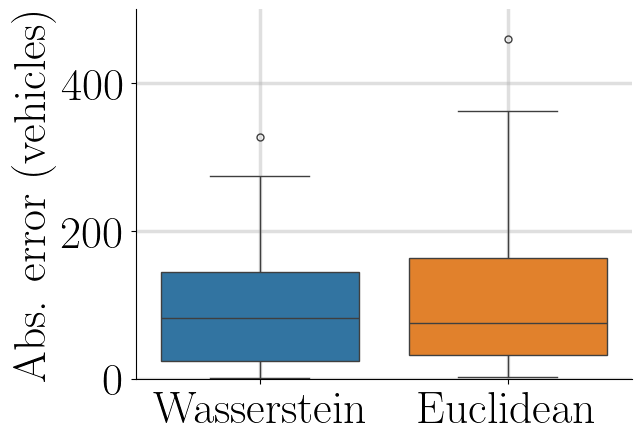

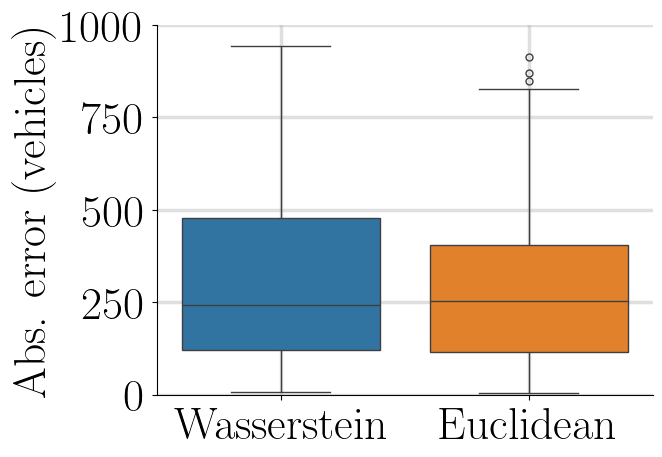

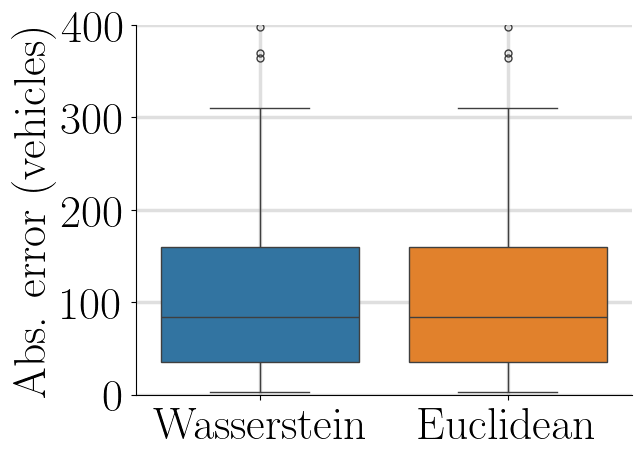

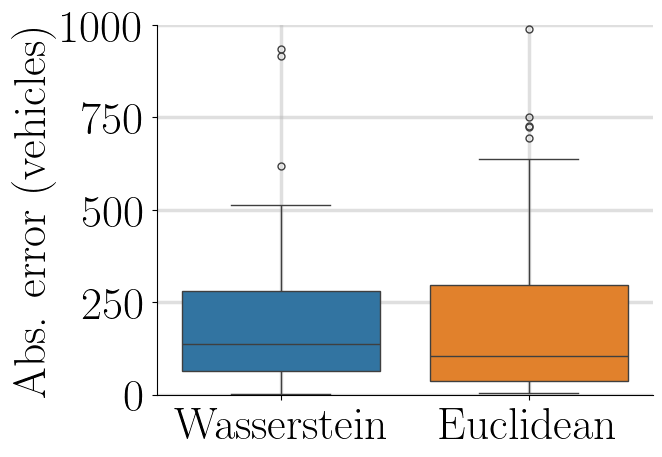

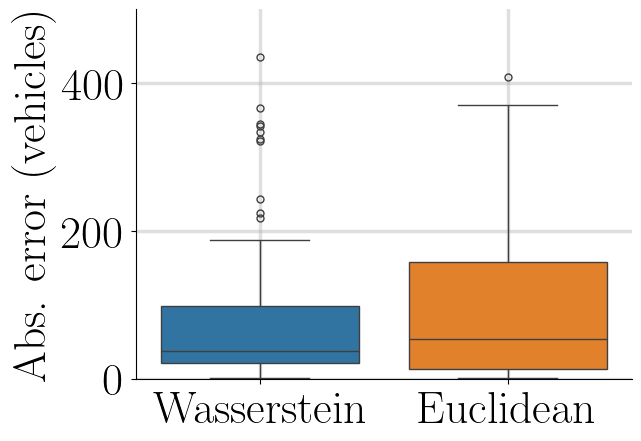

In [375]:
import seaborn as sns

label_size = 33
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

def boxplot_errors(error_dict, filename: str = None, max_y = None):
    errors_total = np.array([
        [v['wasserstein'] for v in error_dict.values()],
        [v['normalized_euclidean'] for v in error_dict.values()]
    ]).T
    labels = ["Wasserstein", "Euclidean"]
    ax = sns.boxplot(errors_total)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, alpha=0.4)

    if max_y is not None:
        plt.ylim([0,max_y])
    ax.set_xticklabels(labels)
    plt.ylabel("Abs. error (vehicles)")
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")
    plt.show()

boxplot_errors(std_errors, 'figures/mta_figures/std.pdf', 500)
boxplot_errors(max_errors, 'figures/mta_figures/max.pdf', 1000)
boxplot_errors(mean_errors, 'figures/mta_figures/mean.pdf', 400)
boxplot_errors(median_errors, 'figures/mta_figures/median.pdf', 1000)
boxplot_errors(var_errors, 'figures/mta_figures/var.pdf', 500)

### EDA

In [400]:
cols = sorted(cols, key=lambda x: (x[1], x[0]))

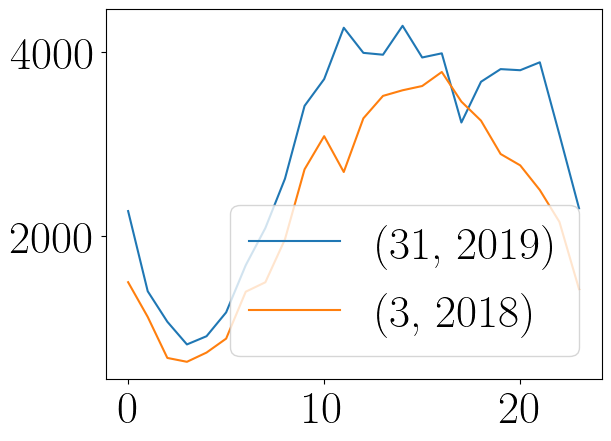

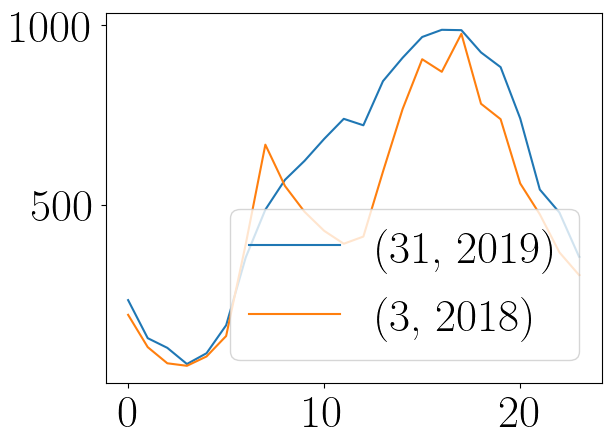

In [428]:
row1 = 3
row2 = 40
col1 = 100
col2 = 20

plt.figure()
plt.plot(list(range(24)),data_dict[(rows[row1], cols[col1])].values.flatten(), label=cols[col1])
plt.plot(list(range(24)),data_dict[(rows[row1], cols[col2])].values.flatten(), label=cols[col2])
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(24)),data_dict[(rows[row2], cols[col1])].values.flatten(), label=cols[col1])
plt.plot(list(range(24)),data_dict[(rows[row2], cols[col2])].values.flatten(), label=cols[col2])
plt.legend()
plt.show()

<Axes: xlabel='Hour'>

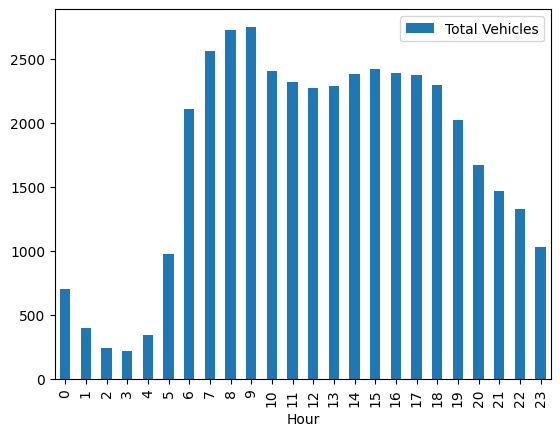

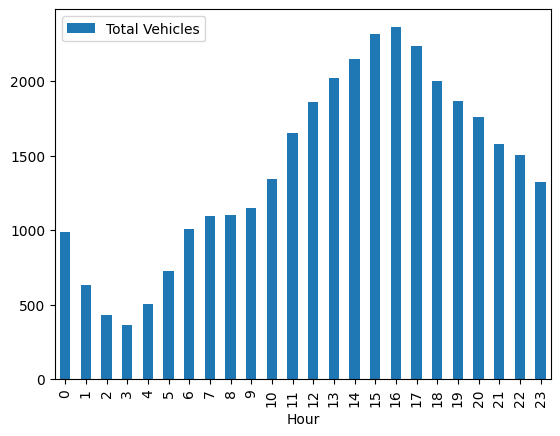

In [ ]:
inbound = mta_data_queens_midtown_tunnel[mta_data_queens_midtown_tunnel['Direction'] == 'I']
outbound = mta_data_queens_midtown_tunnel[mta_data_queens_midtown_tunnel['Direction'] == 'O']

total_vehicles_in = inbound['# Vehicles - E-ZPass'] + inbound['# Vehicles - VToll']
inbound['Total Vehicles'] = total_vehicles_in

total_vehicles_out = outbound['# Vehicles - E-ZPass'] + outbound['# Vehicles - VToll']
outbound['Total Vehicles'] = total_vehicles_out

cols = ['Hour', 'Total Vehicles']

inbound = inbound[cols]
inbound.groupby('Hour').mean().plot(kind='bar')

outbound = outbound[cols]
outbound.groupby('Hour').mean().plot(kind='bar')

<Axes: xlabel='Hour'>

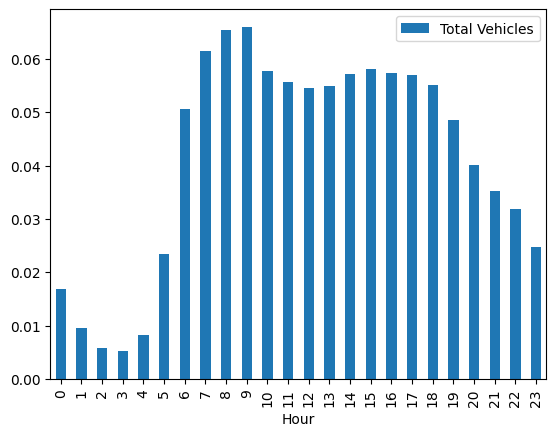

In [ ]:
# We don't want to lose the time series information
# Essentially, we are doing functional matrix completion as opposed to distributional.
# There should not really be much of a difference if we also impute the total number of cars in a matrix cell.

# Let's analyze the wasserstein barycenter between two discrete distributions

inbound_mean = inbound.groupby('Hour').mean()

inbound_mean_scaled = inbound_mean / inbound_mean.sum()
inbound_mean_scaled.plot(kind='bar')

<Axes: xlabel='Hour'>

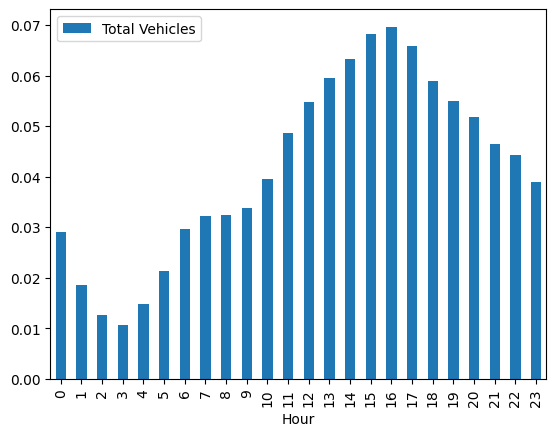

In [ ]:
outbound_mean = outbound.groupby('Hour').mean()

outbound_mean_scaled = outbound_mean / outbound_mean.sum()
outbound_mean_scaled.plot(kind='bar')

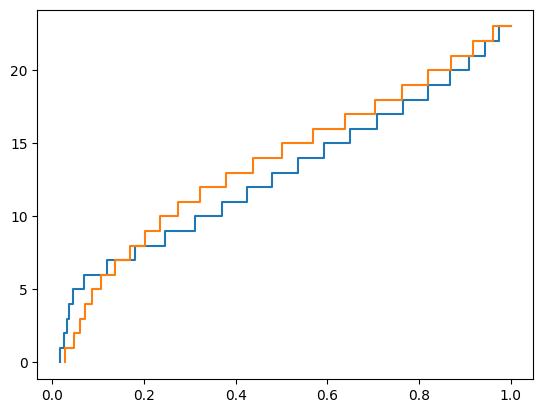

In [ ]:
inbound_mean_scaled_cumsum = inbound_mean_scaled.cumsum()
outbound_mean_scaled_cumsum = outbound_mean_scaled.cumsum()

plt.step(inbound_mean_scaled_cumsum,inbound_mean_scaled_cumsum.index)
plt.step(outbound_mean_scaled_cumsum,outbound_mean_scaled_cumsum.index)

In [ ]:
values = inbound_mean_scaled.index.to_numpy()
cdf = inbound_mean_scaled_cumsum.values.flatten()

In [ ]:
from scipy.integrate import quad
from functools import partial
from numpy import quantile

import warnings
warnings.filterwarnings("ignore")

def wasserstein2(inv_cdf1, inv_cdf2):
    """
    Compute the squared 2-Wasserstein metric.
    """
    # Combine the inner part of the integral into one function
    # Estimate integral via quadrature
    y, _ = quad(lambda x : np.power((inv_cdf1(x) - inv_cdf2(x)), 2), 0, 1)
    return y

In [ ]:
ppf1 = partial(discrete_quantile, inbound_mean_scaled_cumsum.index.to_numpy(), inbound_mean_scaled_cumsum.values.flatten())
ppf2 = partial(discrete_quantile, outbound_mean_scaled_cumsum.index.to_numpy(), outbound_mean_scaled_cumsum.values.flatten())

wasserstein2(ppf1, ppf2)

1.9632668101896897